In [1]:
#!pip install fastai

In [2]:
# Download digit images
from fastai.vision.all import *
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

In [4]:
!head -10 /root/.fastai/data/mnist_sample/labels.csv

name,label
train/3/7463.png,0
train/3/21102.png,0
train/3/31559.png,0
train/3/46882.png,0
train/3/26209.png,0
train/3/41391.png,0
train/3/11910.png,0
train/3/52435.png,0
train/3/21660.png,0


In [5]:
!ls -l /root/.fastai/data/mnist_sample/valid/3 | wc -l

1011


In [6]:
!ls -l /root/.fastai/data/mnist_sample/valid/7 | wc -l

1029


In [7]:
!ls -l /root/.fastai/data/mnist_sample/train/3 | wc -l

6132


In [8]:
!ls -l /root/.fastai/data/mnist_sample/train/7 | wc -l

6266


In [9]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [10]:
(path/'train'/'3').ls().sorted()

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [11]:
(path/'train'/'7').ls().sorted()

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

In [12]:
threes = (path/'train'/'3').ls().sorted()

In [13]:
sevens = (path/'train'/'7').ls().sorted()

In [14]:
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [15]:
im3_path = threes[1]

In [16]:
im3_path

Path('/root/.fastai/data/mnist_sample/train/3/10000.png')

In [17]:
im3 = Image.open(im3_path)

In [18]:
im3

In [19]:
im3.shape

(28, 28)

In [20]:
array(im3).shape

(28, 28)

In [21]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [22]:
type(tensor(im3))

torch.Tensor

In [23]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [24]:
im3_t = tensor(im3)

In [25]:
df = pd.DataFrame(im3_t[4:15,4:22])

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [27]:
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


# First Try: Pixel similarity

In [28]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]

In [29]:
three_tensors = [tensor(Image.open(o)) for o in threes]

In [30]:
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

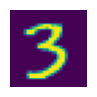

In [31]:
show_image(three_tensors[1])

In [32]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255

In [33]:
stacked_sevens.shape, len(seven_tensors), seven_tensors[0].shape

(torch.Size([6265, 28, 28]), 6265, torch.Size([28, 28]))

In [34]:
stacked_sevens.mean(0).shape

torch.Size([28, 28])

<Axes: >

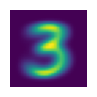

In [35]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

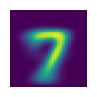

In [36]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

In [37]:
show_image(stacked_sevens.mean(2))

<Axes: >

In [38]:
show_image(stacked_threes.mean(2))

<Axes: >

<Axes: >

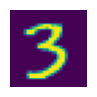

In [39]:
a_3 = stacked_threes[1]
show_image(a_3)

<Axes: >

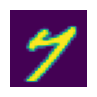

In [40]:
a_7 = stacked_sevens[1]
show_image(a_7)

In [41]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [42]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [43]:
F.l1_loss(a_3.float(), mean7) # l1 loss stands for "mean absolute value"

tensor(0.1586)

In [44]:
F.mse_loss(a_3, mean7).sqrt()  # mse stands for "mean squared error"

tensor(0.3021)

In [45]:

valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [46]:
def mnist_distance(a,b):
  return (a-b).abs().mean((-1,-2))

In [47]:
mnist_distance(a_3, mean3)

tensor(0.1114)

In [48]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist

tensor([0.1277, 0.1225, 0.1292,  ..., 0.1167, 0.1114, 0.1198])

In [49]:
valid_3_dist.shape


torch.Size([1010])

In [50]:
def is_3(x):
  return mnist_distance(x, mean3) < mnist_distance(x,mean7)

In [51]:
is_3(a_3).item()

True

In [52]:
is_3(valid_3_tens).sum()

tensor(926)

In [53]:
accuracy_3s = is_3(valid_3_tens).float().mean()

In [54]:
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

In [55]:
accuracy_3s, accuracy_7s

(tensor(0.9168), tensor(0.9854))

In [56]:
def f(x): return x**2

In [57]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = np.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

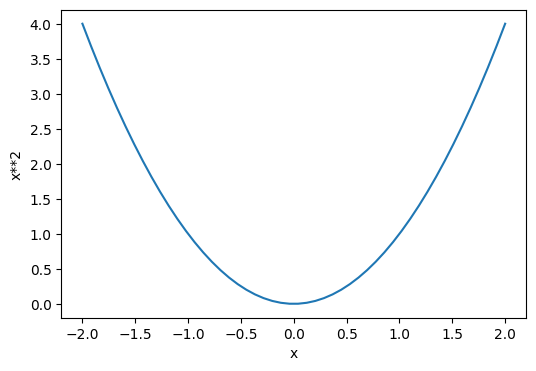

In [58]:
plot_function(f, 'x', 'x**2')

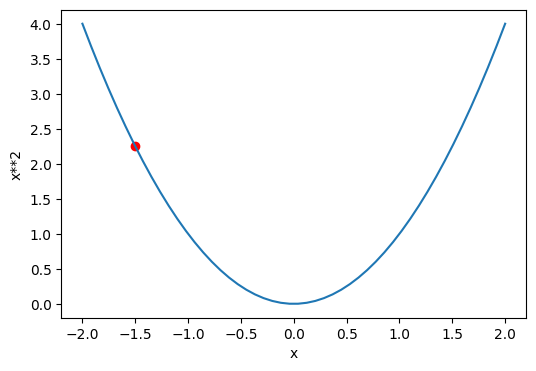

In [59]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [60]:
xt = tensor(3.).requires_grad_()

In [61]:
xt

tensor(3., requires_grad=True)

In [62]:
yt = f(xt)

In [63]:
yt

tensor(9., grad_fn=<PowBackward0>)

In [64]:
yt.backward()

In [65]:
xt

tensor(3., requires_grad=True)

In [66]:
xt.grad

tensor(6.)

In [67]:
xt = tensor([3.,4.,10.]).requires_grad_()

In [68]:
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [69]:
def f(x):
  return (x**2).sum()

In [70]:
yt

tensor(9., grad_fn=<PowBackward0>)

In [71]:
yt = f(xt)

In [72]:
yt

tensor(125., grad_fn=<SumBackward0>)

In [73]:
yt.backward()

In [74]:
xt.grad

tensor([ 6.,  8., 20.])

In [81]:
k = 100
for x in range(5):
  k = k*1.01
  print(k)

101.0
102.01
103.0301
104.060401
105.10100501


In [79]:
k = 100
slot = [3.5, 3.3, 3.1, 2.9, 2.5, 2, 1.5, 1.3, 1.2, 1.1]
for x in range(10):
  k -= -slot[x]* 1
  print(k)

103.5
106.8
109.89999999999999
112.8
115.3
117.3
118.8
120.1
121.3
122.39999999999999


In [142]:
time = torch.arange(0,20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

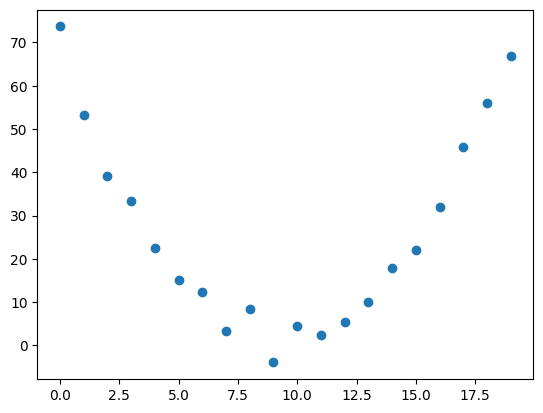

In [143]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [144]:
def f(t, params):
  a, b, c = params
  return a*(t**2) + (b*t) + c

In [145]:
def mse(preds, targets):
  return ((preds-targets)**2).mean()

In [146]:
params = torch.randn(3).requires_grad_()


In [147]:
orig_params = params.clone()

In [148]:
preds = f(time, params)

In [149]:

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-100,100)

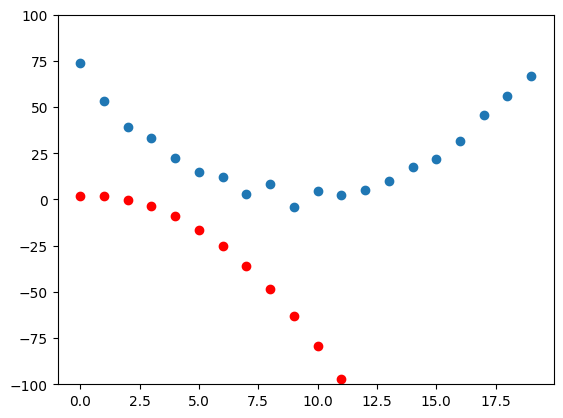

In [150]:
show_preds(preds)

In [151]:
params

tensor([-0.9015,  0.9204,  1.6305], requires_grad=True)

In [152]:
loss = mse(preds, speed)

In [153]:
loss

tensor(27257.9336, grad_fn=<MeanBackward0>)

# Calculate the gradients

In [154]:
loss.backward()

In [155]:
params.grad

tensor([-54738.0391,  -3489.7598,   -253.8729])

In [156]:
params.grad * 1e-05

tensor([-0.5474, -0.0349, -0.0025])

In [157]:
params

tensor([-0.9015,  0.9204,  1.6305], requires_grad=True)

In [158]:
lr = 1e-5
params.data -= lr * params.grad.data

In [159]:
params.grad = None

In [160]:
params

tensor([-0.3541,  0.9553,  1.6331], requires_grad=True)

In [161]:
preds = f(time, params)

In [162]:
mse(preds, speed)

tensor(5671.8799, grad_fn=<MeanBackward0>)

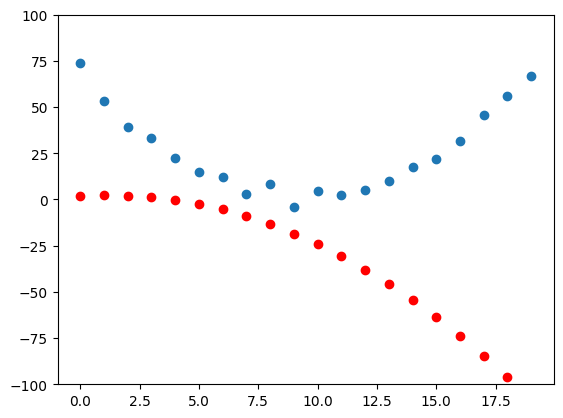

In [163]:
show_preds(preds)

In [164]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [165]:
for i in range(50):
  apply_step(params)

5671.8798828125
1587.131103515625
814.1663208007812
667.8919677734375
640.2066650390625
634.9619750976562
633.9637451171875
633.7691650390625
633.7264404296875
633.7127075195312
633.7042846679688
633.6968994140625
633.689697265625
633.6826782226562
633.6754760742188
633.6683959960938
633.6613159179688
633.6541748046875
633.6470947265625
633.6400146484375
633.6329345703125
633.625732421875
633.6187133789062
633.6116943359375
633.6045532226562
633.5975341796875
633.5904541015625
633.583251953125
633.576171875
633.5690307617188
633.56201171875
633.554931640625
633.5478515625
633.5406494140625
633.5336303710938
633.526611328125
633.5194702148438
633.5123901367188
633.5052490234375
633.4982299804688
633.4911499023438
633.484130859375
633.4771118164062
633.4700927734375
633.462890625
633.4557495117188
633.4488525390625
633.4417114257812
633.4346923828125
633.4276123046875


In [166]:
params = orig_params.detach().requires_grad_()

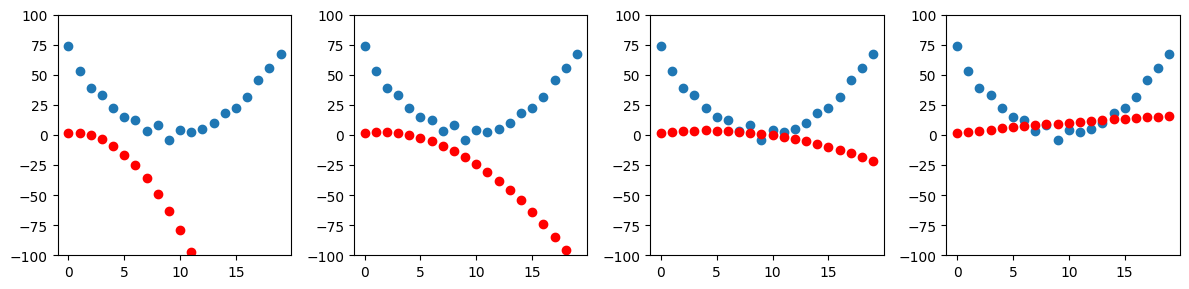

In [167]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()